### **Mall Customer Clustering dengan K-Means Clustering**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Menampilkan Dataset
customer_data = pd.read_csv('/content/Mall_Customers.csv')
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

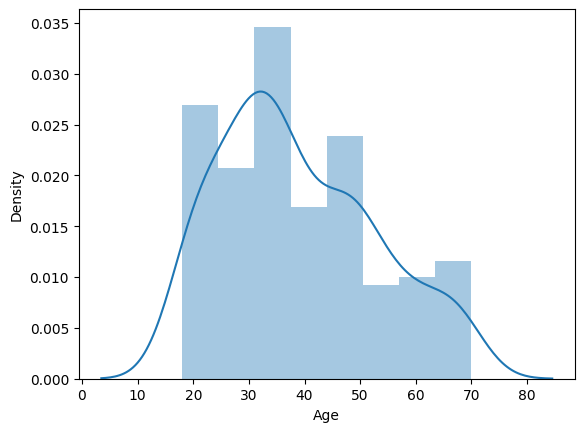

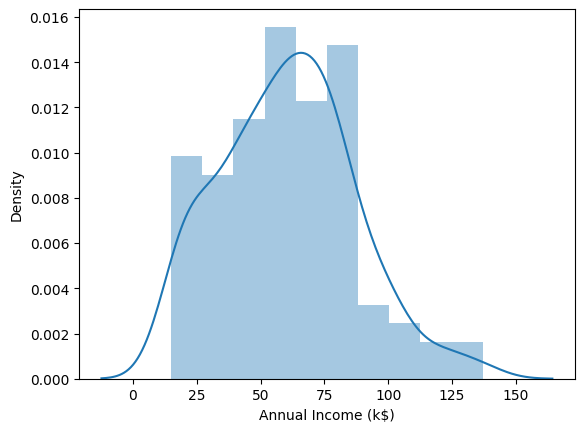

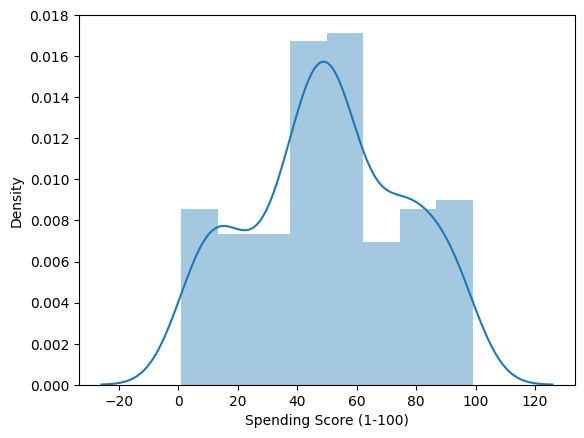

In [9]:
# Membuat distribution plot yang menggambarkan distribusi data dari kolom Age, Annual Income, dan Spending Score
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.distplot(customer_data[i])

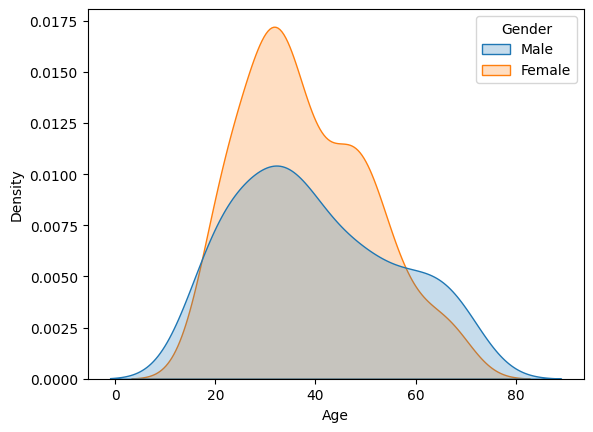

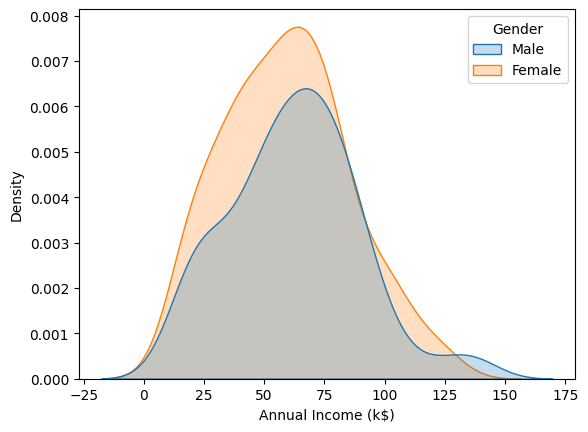

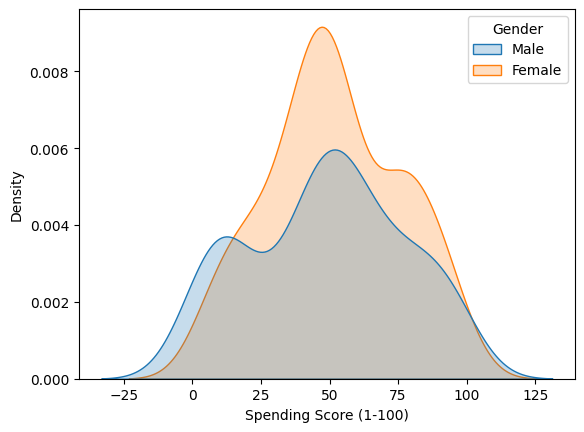

In [10]:
# Membuat Kernel Density Estimate (KDE) plot untuk membandingkan distribusi data berdasarkan Gender
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  # Mengubah data ke dalam bentuk long-form
  melted_data = pd.melt(customer_data, id_vars=['Gender'], value_vars=[i])
  sns.kdeplot(data=melted_data, x='value', hue='Gender', shade=True)
  plt.xlabel(i)
  plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

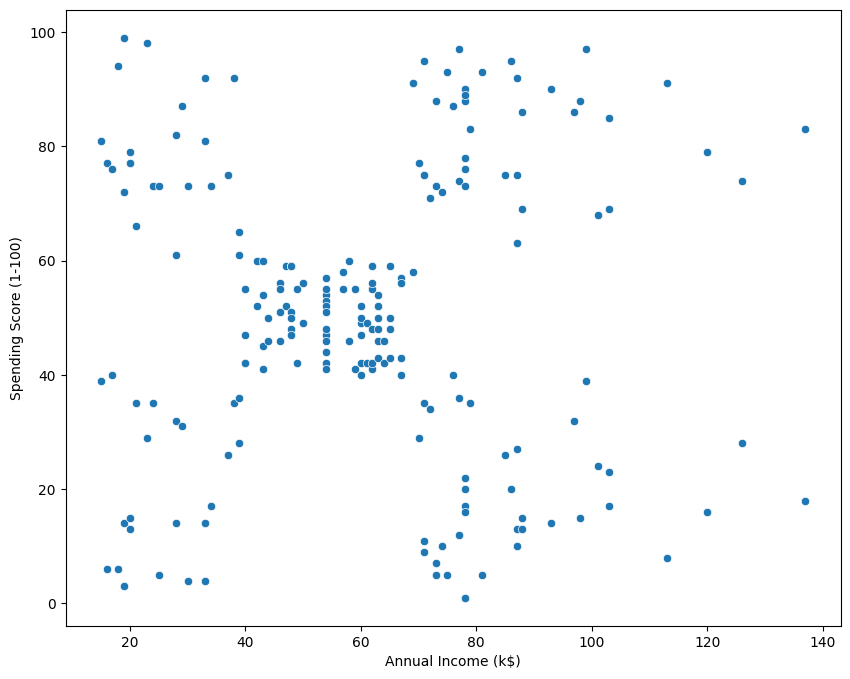

In [11]:
# Scatter plot untuk mengidentifikasi struktur kelompok dalam data
plt.figure(figsize=(10,8))
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)')

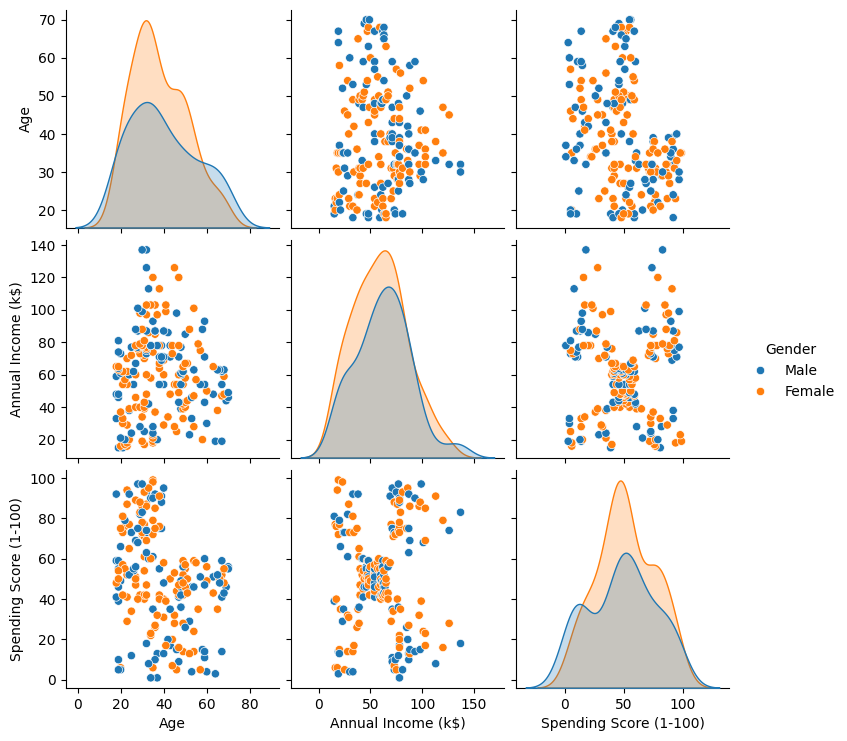

In [12]:
customer_data=customer_data.drop('CustomerID', axis=1)
sns.pairplot(customer_data,hue='Gender')

In [13]:
customer_data.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [14]:
# Matriks korelasi untuk mengidentifikasi hubungan antar variabel
customer_data.select_dtypes(include=np.number).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

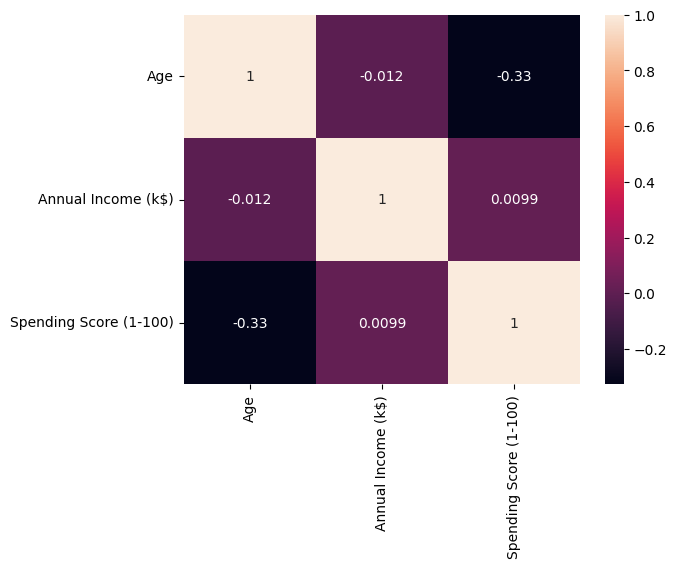

In [15]:
sns.heatmap(customer_data.select_dtypes(include=np.number).corr(),annot=True)

**Korelasi antara Age dan Annual Income : -0.012**

memiliki hubungan negatif, yang berarti semakin tua seseorang, semakin kecil annual incomenya


**Korelasi antar Age dan Spending Score : -0.33**

memiliki hubungan negatif, yang berarti semakin tua seseorang, spending score atau pengeluaran cenderung semakin rendah


**Korelasi antara Annual Income dan Spending Score : 0.0099**

memiliki hubungan positif, yang berarti semakin besar annual income seseorang, semakin besar pula spending scorenya


---



### **Clustering**

In [ ]:
#Clustering dengan 1 fitur (Annual Income)
clustering1 = KMeans(n_clusters=3)
clustering1.fit(customer_data[['Annual Income (k$)']])

In [17]:
labels = clustering1.labels_
showcluster1 = labels + 1
showcluster1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [18]:
customer_data['Income Cluster'] = showcluster1
customer_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,3
196,Female,45,126,28,3
197,Male,32,126,74,3
198,Male,32,137,18,3


In [19]:
customer_data['Income Cluster'].value_counts()

,count
Income Cluster,
2,90
1,74
3,36


In [20]:
# Menentukan jumlah cluster optimal
clustering1.inertia_

23517.33093093092

In [21]:
inertia_scores=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(customer_data[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)
inertia_scores

[137277.2800000002,
 48660.88888888887,
 25341.285871863212,
 14647.235170393054,
 8675.385020242913,
 5443.614973544972,
 3949.275613275612,
 2919.551493930906,
 2299.0466089466095,
 1901.0109598004328]

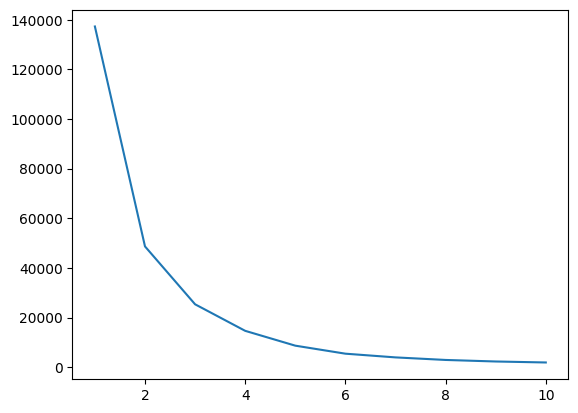

In [22]:
plt.plot(range(1,11), inertia_scores)

In [23]:
customer_data.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000
3,37.833333,99.888889,50.638889


In [ ]:
#Clustering dengan 2 fitur (Annual income dan Spending score)
clustering2 = KMeans(n_clusters=5)
clustering2.fit(customer_data[['Annual Income (k$)', 'Spending Score (1-100)']])

In [25]:
labels = clustering2.labels_
showcluster2 = labels + 1
showcluster2

array([1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 3,
       1, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 3, 2, 4, 2, 4, 2,
       3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [26]:
customer_data['Spending and Income Cluster'] = showcluster2
customer_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,5
2,Female,20,16,6,1,1
3,Female,23,16,77,1,5
4,Female,31,17,40,1,1
...,...,...,...,...,...,...
195,Female,35,120,79,3,2
196,Female,45,126,28,3,4
197,Male,32,126,74,3,2
198,Male,32,137,18,3,4


In [27]:
customer_data['Spending and Income Cluster'].value_counts()

,count
Spending and Income Cluster,
3,81
2,39
4,35
1,23
5,22


In [28]:
# Menentukan jumlah cluster optimal
clustering2.inertia_

44448.45544793369

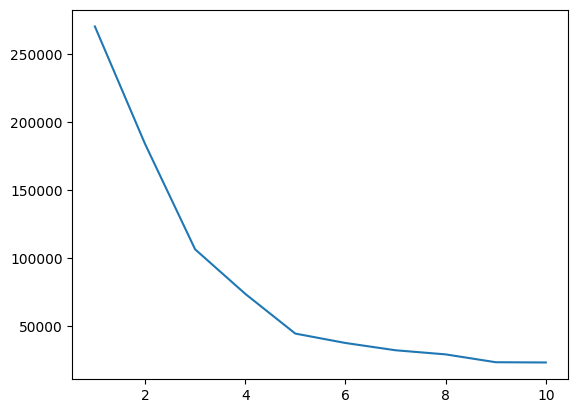

In [34]:
inertia_scores2=[]
for i in range(1,11):
  kmeans2=KMeans(n_clusters=i)
  kmeans2.fit(customer_data[['Annual Income (k$)','Spending Score (1-100)']])
  inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [30]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

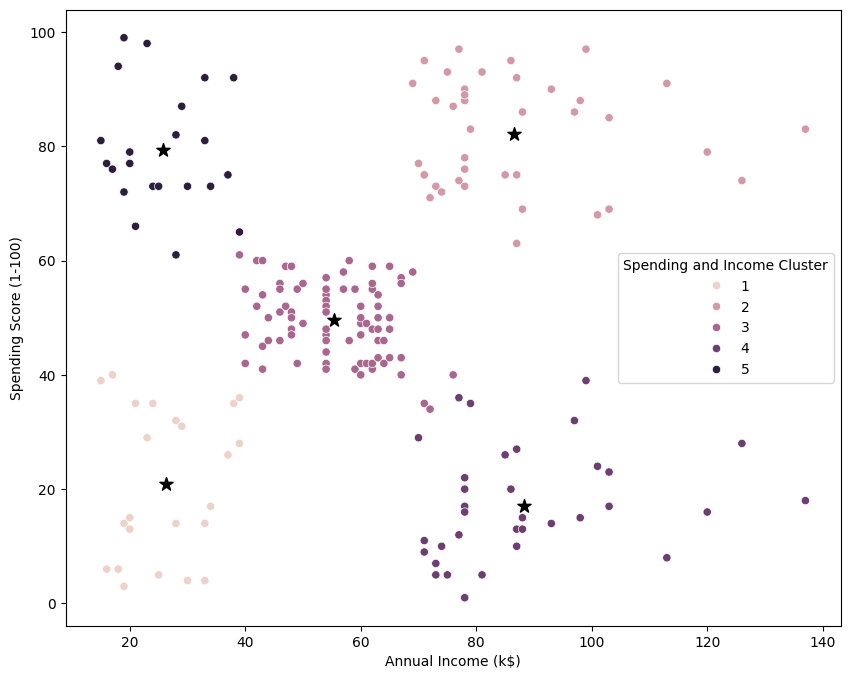

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Spending and Income Cluster')

In [32]:
pd.crosstab(customer_data['Spending and Income Cluster'], customer_data['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
1,0.608696,0.391304
2,0.538462,0.461538
3,0.592593,0.407407
4,0.457143,0.542857
5,0.590909,0.409091




---


**Cluster 1 :**

Pelanggan memiliki pendapatan rendah (sekitar 20-40 k$) dengan Spending Score rendah (sekitar 0-40)

**Cluster 2 :**

Pelanggan memiliki pendapatan sedang (sekitar 40-70 k$) dengan Spending Score sedang (sekitar 40-60)

**Cluster 3 :**

Pelanggan memiliki pendapatan tinggi (sekitar 60-140 k$) dengan Spending Score rendah (sekitar 0-40)

**Cluster 4 :**

Pelanggan memiliki pendapatan tinggi (sekitar 60-120 k$) dengan Spending Score tinggi (sekitar 60-100)

**Cluster 5 :**

Pelanggan memiliki pendapatan rendah (sekitar 20-40 k$) dengan Spending Score tinggi (sekitar 60-100)